In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


### **Exploratory Data Analysis**

#### *Basic info*
quickly understand shape, types, missing / suspicious values, class balance, and basic statistics

In [ ]:
# load data
df = pd.read_csv(r"C:\Users\Shahe\OneDrive\Desktop\ml_project\diabetes.csv") 

In [ ]:
# shape of the data
print("Shape:", df.shape)

Shape: (768, 9)


In [ ]:
# first few rows
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# basic info, data types, missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Descriptive stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
# Class balance
print("Outcome counts:", )
display(df['Outcome'].value_counts())

Outcome counts:


Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
# Class balance
print("Outcome proportions:")
display(df['Outcome'].value_counts(normalize=True))

Outcome proportions:


Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [ ]:
# correlation 
display(df.corr().round(3))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


### **Preprocessing**
*prepare data for modeling*: fix missing values (zeros), split into train/test, and scale numeric features.

In [ ]:
# Check zeros in features that shouldn't be zero
cols_with_zeros = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
zero_counts = (df[cols_with_zeros] == 0).sum().sort_values(ascending=False)
print("\nZero counts (likely missing):")
zero_counts

In [126]:
# replace zeros with NaN in features that shouldn't be zero
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

In [15]:
print("Missing after replace:")
df.isnull().sum()

Missing after replace:


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
# Median imputation is a robust and common technique because it prevents the imputed values from being skewed by outliers, unlike mean imputation.
imputer = SimpleImputer(strategy='median')
df[cols_with_zeros] = imputer.fit_transform(df[cols_with_zeros])
print("Missing after imputation:")
df.isnull().sum()

Missing after imputation:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Insulin_log                 0
Glucose_log                 0
BMI_log                     0
Age_log                     0
dtype: int64

In [18]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### **Visual EDA**

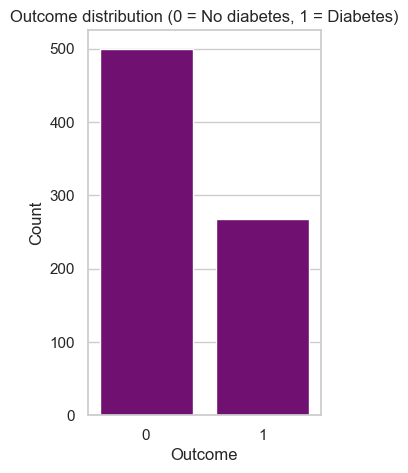

In [129]:

# Use the imputed dataframe from preprocessing step
df_plot = df.copy()

# Outcome distribution (bar)
plt.figure(figsize=(3,5))
sns.countplot(data=df_plot, x='Outcome', color='purple')
plt.title('Outcome distribution (0 = No diabetes, 1 = Diabetes)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


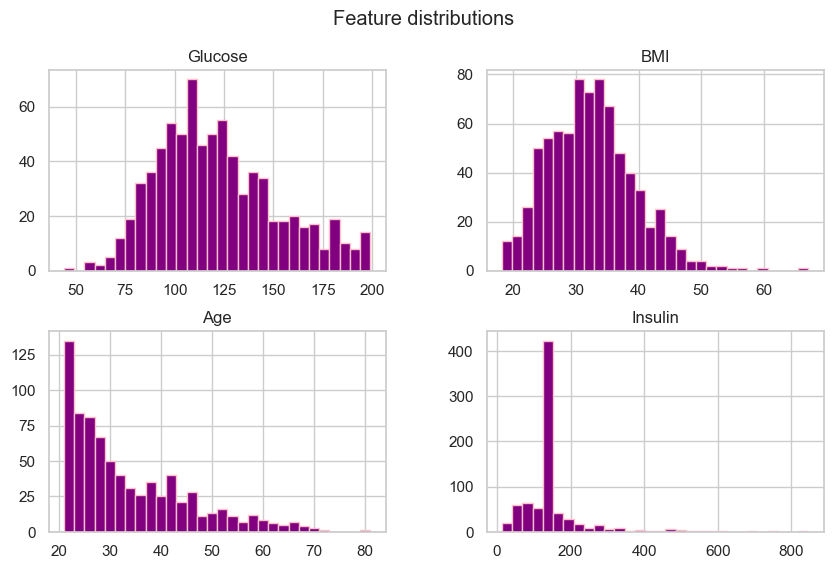

In [43]:
# Histograms of selected key features
key_feats = ['Glucose','BMI','Age','Insulin']
df_plot[key_feats].hist(bins=30, figsize=(10,6), color='purple', edgecolor='pink')
plt.suptitle('Feature distributions')
plt.show()

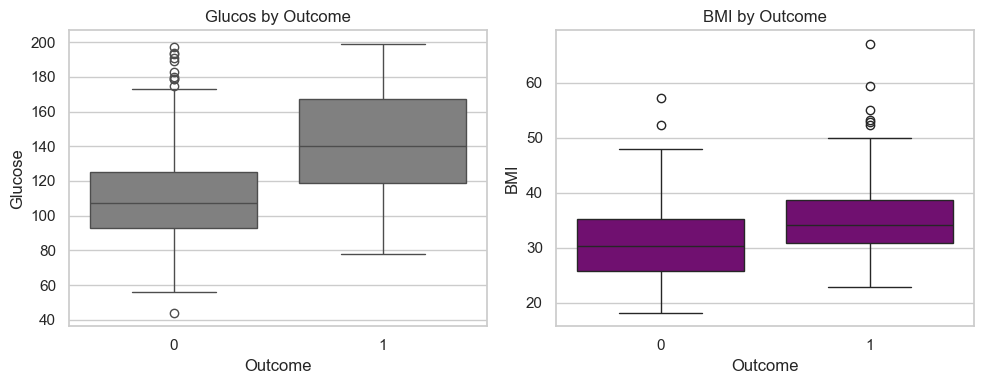

In [120]:
# Boxplots of features by outcome (BMI & BMI_log are most informative)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='Outcome', y='Glucose', data=df, color='gray')
plt.title('Glucos by Outcome')
plt.subplot(1,2,2)
sns.boxplot(x='Outcome', y='BMI', data=df, color='purple')
plt.title('BMI by Outcome')
plt.tight_layout()
plt.show()

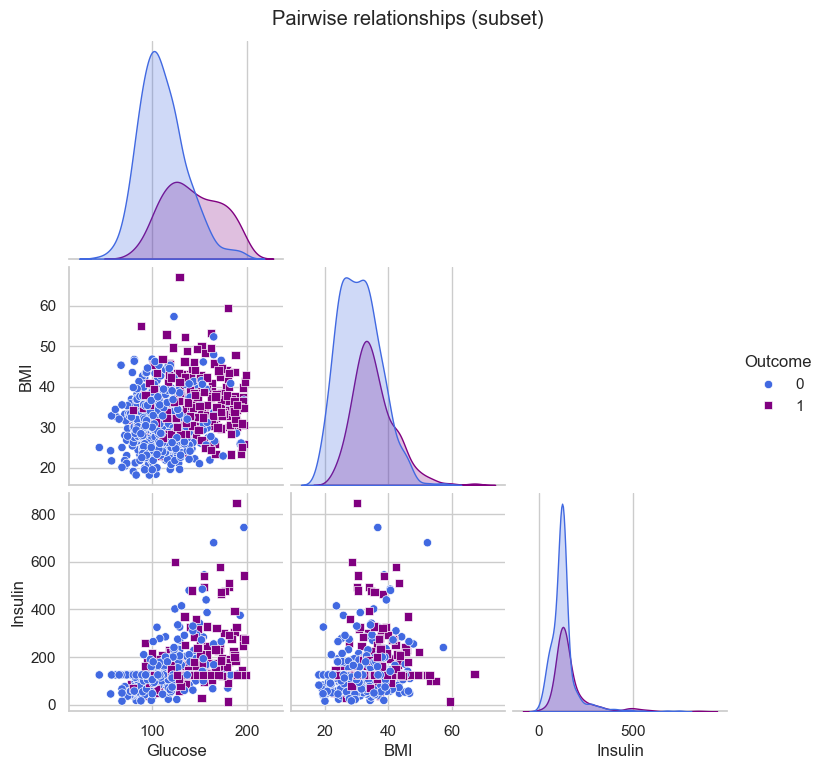

In [90]:
# Pairplot for a subset 
subset = ['Glucose','BMI','Insulin','Outcome']
sns.pairplot(df_plot[subset], hue='Outcome', markers=["o","s"], diag_kind='kde', corner=True, palette={ "royalblue",  "purple"})
plt.suptitle('Pairwise relationships (subset)', y=1.02)
plt.show()

##### *Handling Skewed Distributions*
Features like Insulin, BMI and Age are right-skewed, to reduce extreme outliers, makes distribution closer to normal, and improves linear model's performance. Log-transform reduces extreme values’ influence, making the feature distribution more symmetric, stabilizing linear relationships, and improving models’ learning -especially for Logistic Regression-

In [ ]:
# Log-transform skewed numeric features:
for col in ['Insulin','Glucose','BMI']:
    df[col + '_log'] = np.log1p(df[col])

# Drop original skewed columns:
df = df.drop(columns=['Insulin','Glucose','BMI'])

##### *Feature Engineering*
to transform continuous variables into more meaningful inputs for the model. First, the continuous 'Age' feature is converted into the categorical feature 'Age_group' by binning it into distinct ranges like '20-30' and '50+'. Similarly, the continuous 'BMI' is converted into the categorical feature 'BMI_cat' (e.g., 'Normal', 'Obese') using a custom function based on clinical guidelines, which simplifies the relationship to diabetes risk for the model. The process concludes by creating interaction terms by multiplying features like Glucose_log and Age to capture non-linear relationships, and then one-hot encoding the newly created categorical columns ('Age_group' and 'BMI_cat') into dummy variables, dropping the first level of each to prevent multicollinearity.


In [ ]:
# converts a continuous variable into a categorical feature to let the model focuses on “risk group” patterns
df['Age_group'] = pd.cut(df['Age'], bins=[20,30,40,50,100], labels=['20-30','30-40','40-50','50+'])


# BMI category, converts a continuous variable into a categorical feature is easier for the model to relate BMI to risk.
# also clinically, diabetes risk is better captured by BMI categories than exact BMI numbers
def bmi_category(bmi):
    if bmi < 18.5: return 'Underweight'
    elif bmi < 25: return 'Normal'
    elif bmi < 30: return 'Overweight'
    else: return 'Obese'
df['BMI_cat'] = df['BMI_log'].apply(lambda x: bmi_category(np.expm1(x)))  


# Interaction terms, Captures relationships between features affect diabetes risk more than either feature alone
df['Glucose_log*Age'] = df['Glucose_log'] * df['Age']
df['BMI_log*Age'] = df['BMI_log'] * df['Age']

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Age_group','BMI_cat'], drop_first=True)

In [ ]:
# Correlation heatmap
plt.figure(figsize=(9,7))
corr = df_plot.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature correlation matrix')
plt.show()

In [ ]:
df.to_csv(r"C:\Users\Shahe\OneDrive\Desktop\ml_project\new_diabetes.csv", index=False)

#### **data preparation and splitting**
prepares a dataset for a machine learning model by first separating the features ($\mathbf{X}$) from the target outcome ($\mathbf{y}$). Next, it splits the data into $\mathbf{80\%}$ for training and $\mathbf{20\%}$ for testing using a stratified approach to keep the proportion of the outcome consistent in both sets, ensuring the results are reproducible with a set random_state. Finally, it applies StandardScaler to a specific list of numeric columns, fitting the transformation (calculating mean and standard deviation) only on the training data and then transforming both the training and test sets, a crucial step to standardize the data and prevent information leakage from the test set.

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale numeric features (especially for logistic regression)
numeric_cols = ['Pregnancies','BloodPressure','SkinThickness','DiabetesPedigreeFunction',
                'Age','Insulin_log','Glucose_log','BMI_log','Glucose_log*Age','BMI_log*Age']

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols]  = scaler.transform(X_test[numeric_cols])

print("Pipeline ready! Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


### **Baseline Models**
##### Logistic Regression +  RandomForest

##### **Logistic Regression Baseline**